In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from common import make_data_dict, make_sur_map, make_bin_map, make_sur, myscore

sensor_data = make_data_dict()

In [2]:
myscore = lambda x : np.abs(x-np.mean(x))/np.std(x)

In [15]:
pre_map =  make_sur_map(sensor_data['S8'][0])
post_map =  make_sur_map(sensor_data['S8'][1])
df2 = pd.read_csv("data/bin_map/EllipticIRRAD8.csv", skiprows=1, names=['col','row','bin'], sep=" ")
bin_map = make_bin_map(df2)

pre = pd.merge(sensor_data['S8'][0], df2, on=['col','row'])
post = pd.merge(sensor_data['S8'][1], df2, on=['col','row'])

Text(0.5, 1.0, 'Sensor bins')

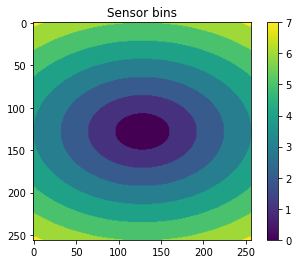

In [16]:
im = plt.imshow(bin_map)
plt.colorbar(im)
plt.title('Sensor bins')

In [17]:
def cut_range(df):
    p0_range=(-10,10)
    p1_range=(0,0.010)
    c_range=(0,15000)
    t_range=(-2000,3000)
    df=df[df['p0'].between(*p0_range) & df['p1'].between(*p1_range) & df['c'].between(*c_range) & df['t'].between(*t_range)]
    return df

def clean_parameters(df):
    df = cut_range(df)
    pre2 = df[['col','row','p0','p1','c','t']][(myscore(df[['p0','p1','c','t']]) < 3).all(axis=1)]
    return pre2

Text(0.5, 0, 't')

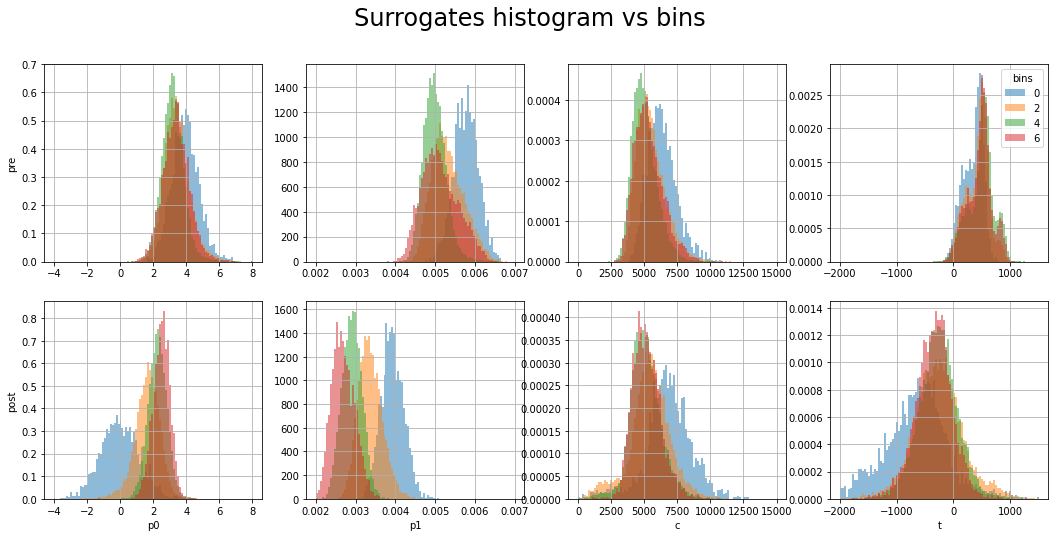

In [6]:
#plt.style.use("bmh")
fig, axes = plt.subplots(2,4,figsize=(18,8))

#p0_range=(-10,10)
#p1_range=(0,0.010)
#c_range=(0,15000)
#t_range=(-2000,3000)
p0_range=(-4,8)
p1_range=(0.002,0.007)
c_range=(0,15000)
t_range=(-2000,1500)
axe = axes[0]
fig.suptitle("Surrogates histogram vs bins", fontsize=24)
for name, group in pre.groupby('bin'):
    if str(name) in "1357":
        continue
    #pre2= clean_parameters(group)
    pre2 = cut_range(group)
    label = name
    pre2['p0'].hist(range=p0_range, bins=100, ax=axe[0], alpha=0.5, label=label, density=True)
    pre2['p1'].hist(range=p1_range,bins=100, ax=axe[1], alpha=0.5, label=label, density=True)
    pre2['c'].hist(range=c_range, bins=100, ax=axe[2], alpha=0.5, label=label, density=True)
    pre2['t'].hist(range=t_range,bins=100, ax=axe[3], alpha=0.5, label=label, density=True)
axe[3].legend(prop={'size': 10}, title='bins')
axe[0].set_ylabel('pre')

    
axe = axes[1]
for name, group in post.groupby('bin'):
    if str(name) in "1357":
        continue
    #pre2= clean_parameters(group)
    pre2 = cut_range(group)
    pre2['p0'].hist(range=p0_range, bins=100, ax=axe[0], alpha=0.5, label=label, density=True)
    pre2['p1'].hist(range=p1_range,bins=100, ax=axe[1], alpha=0.5, label=label, density=True)
    pre2['c'].hist(range=c_range, bins=100, ax=axe[2], alpha=0.5, label=label, density=True)
    pre2['t'].hist(range=t_range,bins=100, ax=axe[3], alpha=0.5, label=label, density=True)

axe[0].set_xlabel('p0')
axe[0].set_ylabel('post')
axe[1].set_xlabel('p1')
axe[2].set_xlabel('c')
axe[3].set_xlabel('t')

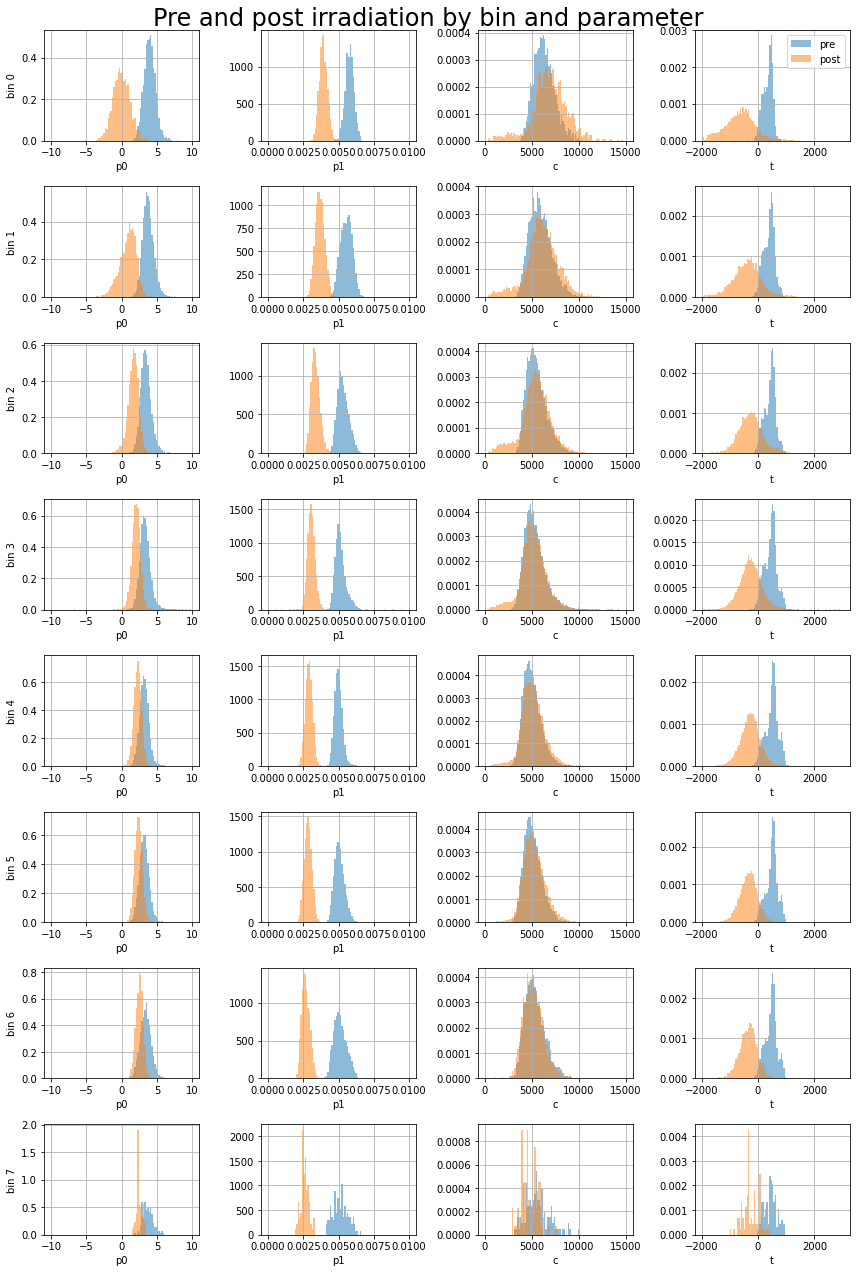

In [7]:
#plt.style.use("bmh")
fig, axes = plt.subplots(8,4,figsize=(12,18))

p0_range=(-10,10)
p1_range=(0,0.010)
c_range=(0,15000)
t_range=(-2000,3000)
param_list = ['p0','p1','c','t']
param_ranges = dict(zip(param_list, [p0_range,p1_range, c_range, t_range]))
fig.suptitle("Pre and post irradiation by bin and parameter", fontsize=24)
for name, group in pre.groupby('bin'):
    pre2 = group
    for i, param in enumerate(param_list):
        label = name
        ax = axes[name][i]
        pre2[param].hist(range=param_ranges[param], bins=100, ax=ax, alpha=0.5, label='pre', density=True)


for name, group in post.groupby('bin'):
    pre2 = group
    for i, param in enumerate(param_list):
        label = name
        ax = axes[name][i]
        pre2[param].hist(range=param_ranges[param], bins=100, ax=ax, alpha=0.5, label='post', density=True)
        axes[name][0].set_ylabel(f'bin {name}')
        axes[name][i].set_xlabel(f'{param}')

axes[0][3].legend(prop={'size': 10})
fig.tight_layout()

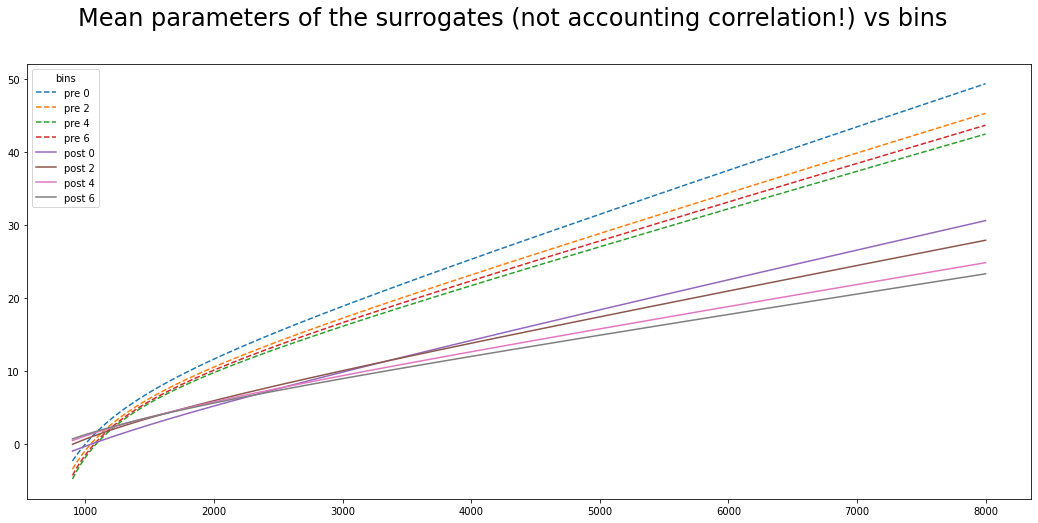

In [8]:
#plt.style.use("bmh")
fig, axes = plt.subplots(1,1,figsize=(18,8), sharey=True)
max_tp_charge = 8000
x = np.linspace(900, max_tp_charge, 1000)
p0_range=(-10,10)
p1_range=(0,0.010)
c_range=(0,15000)
t_range=(-2000,3000)
axe = axes
fig.suptitle("Mean parameters of the surrogates (not accounting correlation!) vs bins", fontsize=24)
for name, group in pre.groupby('bin'):
    if str(name) in "1357":
        continue
    pre2 = cut_range(group)
    margs = pre2.mean()
    sur = make_sur(margs['p0'], margs['p1'], margs['c'], margs['t'])
    y = sur(x)
    axe.plot(x,y, '--',label='pre '+str(name))
    
for name, group in post.groupby('bin'):
    if str(name) in "1357":
        continue
    pre2 = cut_range(group)
    margs = pre2.mean()
    sur = make_sur(margs['p0'], margs['p1'], margs['c'], margs['t'])
    y = sur(x)
    axe.plot(x,y,  label='post '+str(name))
    
axe.legend(prop={'size': 10}, title='bins')

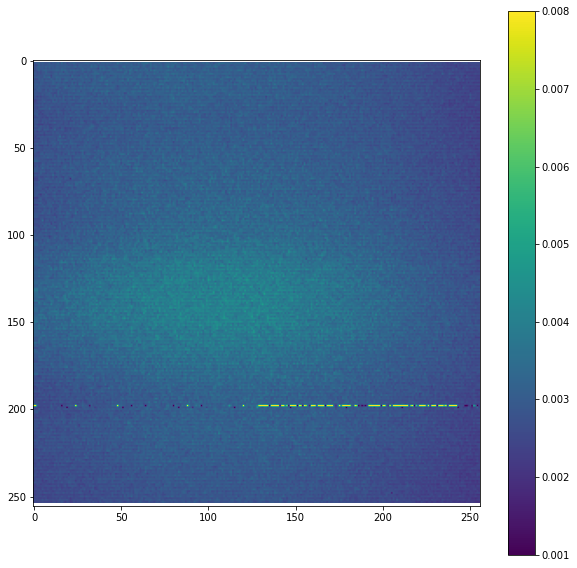

In [9]:
fig, axe = plt.subplots(1,1, figsize=(10,10))
from matplotlib.colors import LogNorm
cpmap = make_sur_map(clean_parameters(post))
post_map =  make_sur_map(sensor_data['S8'][1])
post_map[post_map[:,:,1]<0.001] = 0.001 
post_map[post_map[:,:,1]>0.008] = 0.008
im = axe.imshow(post_map[:,:,1])
fig.colorbar(im, ax=axe)

([], [], [], [])

0
1
2
3
4
5
6
7


Text(0.5, 0, 'post')

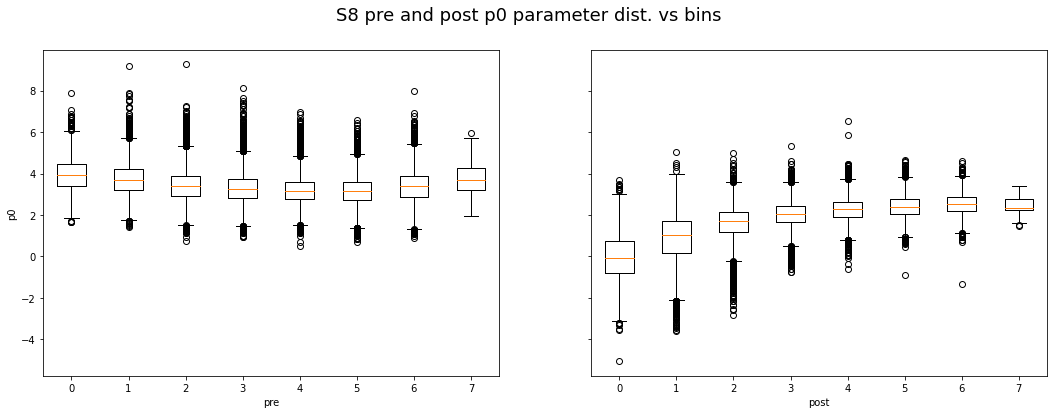

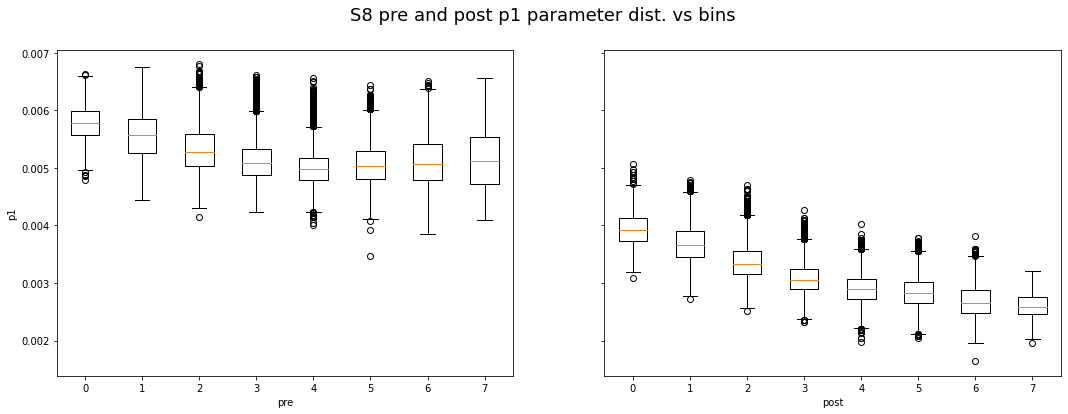

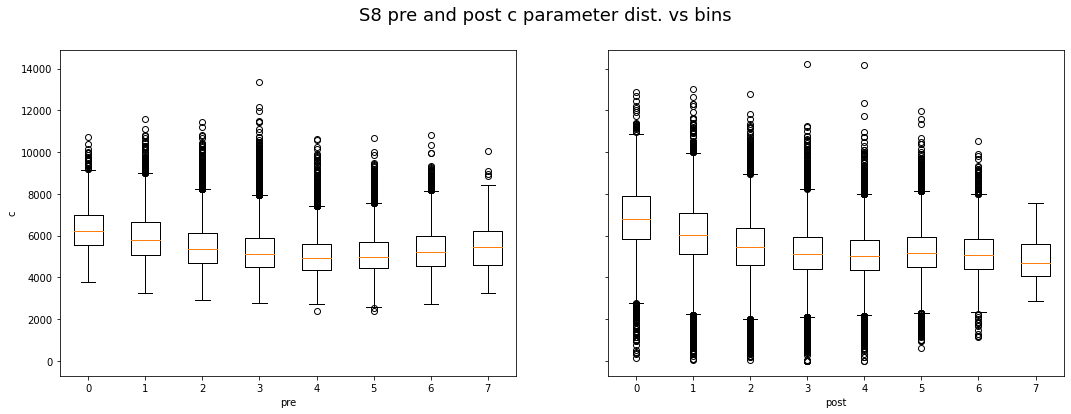

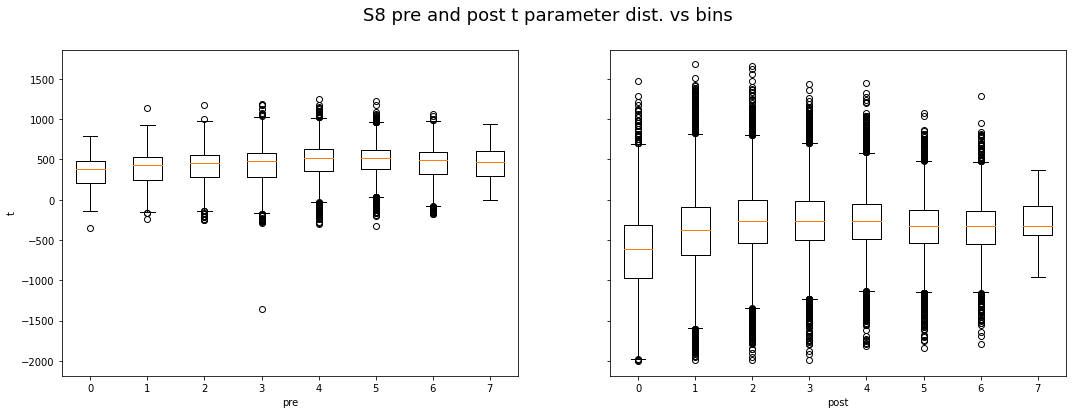

In [83]:
#plt.style.use("bmh")

#p0_range=(-10,10)
#p1_range=(0,0.010)
#c_range=(0,15000)
#t_range=(-2000,3000)
p0_range=(-4,8)
p1_range=(0.002,0.007)
c_range=(0,15000)
t_range=(-2000,1500)

prep0, prep1, prec, pret = [], [], [], []

for name, group in pre.groupby('bin'):
    pre2 = cut_range(group)
    label = name
    prep0.append(pre2['p0'])
    prep1.append(pre2['p1'])
    prec.append(pre2['c'])
    pret.append(pre2['t'])
    #pre2['t'].boxplot(range=t_range,bins=100, ax=axe[3], alpha=0.5, label=label, density=True)
    #pre2['t'].boxplot(range=t_range,bins=100, ax=axe[3], alpha=0.5, label=label, density=True)

    
p0, p1, c, t = [], [], [], []
for name, group in post.groupby('bin'):
    pre2 = cut_range(group)
    label = name
    print(name)
    p0.append(pre2['p0'])
    p1.append(pre2['p1'])
    c.append(pre2['c'])
    t.append(pre2['t'])

labels = list(map(str, range(8))  )
fsize = (18,6)
fig, ax = plt.subplots(1,2,figsize=fsize, sharey=True)

fig.suptitle("S8 pre and post p0 parameter dist. vs bins", fontsize=18)
ax[0].boxplot(prep0, labels=labels)                    
ax[0].set_ylabel('p0')
ax[1].boxplot(p0, labels=labels)                    
ax[0].set_xlabel('pre')
ax[1].set_xlabel('post')

fsize = (18,6)
fig, ax = plt.subplots(1,2,figsize=fsize, sharey=True)
fig.suptitle("S8 pre and post p1 parameter dist. vs bins", fontsize=18)
ax[0].boxplot(prep1, labels=labels)                                        
ax[0].set_ylabel('p1')
ax[1].boxplot(p1, labels=labels)                    
ax[0].set_xlabel('pre')
ax[1].set_xlabel('post')

fsize = (18,6)
fig, ax = plt.subplots(1,2,figsize=fsize, sharey=True)
fig.suptitle("S8 pre and post c parameter dist. vs bins", fontsize=18)
ax[0].boxplot(prec, labels=labels)                    
ax[0].set_ylabel('c')
ax[1].boxplot(c, labels=labels)                    
ax[0].set_xlabel('pre')
ax[1].set_xlabel('post')

fsize = (18,6)
fig, ax = plt.subplots(1,2,figsize=fsize, sharey=True)
fig.suptitle("S8 pre and post t parameter dist. vs bins", fontsize=18)
ax[0].boxplot(pret, labels=labels)                    
ax[0].set_ylabel('t')
ax[1].boxplot(t, labels=labels)                    
ax[0].set_xlabel('pre')
ax[1].set_xlabel('post')




In [39]:
len(p0[0])

2153

In [35]:

p0, p1, c, t = ([],)*4

In [36]:
p0

[]